# Project Objectives

1. Learn which descriptive features might affect heart disease.

    a. Using Data Exploration (EDA) to show simple graphics relationships among the variables.

    b. Clustering to determine whether there are natural groupings within our patients, for example, younger/Typical Angina vs older/Asymptomatic. Then, see if these clusters differ with respect to their response to having a heart disease.

    c. Use Association Rules to see whether there are useful relationships among subsets of the records. For example, "If high cholesterol, then heart disease = yes" has good support and high confidence. This would allow our doctors to focus on patients with high cholesterol for early treatment, independent of the results of our overall modeling.

2. Develop a model or models to predict whether the patient has heart disease or not.

    a. Develop the best classification model using these algorithms:

        i. CART

        ii. C5.0

        iii. Random Forests

        iv. Naïve Bayes Classification

        v. Neural Networks

    b. Evaluate each model based on predetermined model evaluation criteria, such as misclassification costs. Construct a table of the best models and their costs.
    
    c. Consult with the team regarding the best model or models with which to move forward to the deployment phase.


<h1>Dataset Description</h1>

<table>
<thead><tr>
<th>Attribute</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Age</strong></td>
<td>Age of a patient [years]</td>
</tr>
<tr>
<td><strong>Sex</strong></td>
<td>Gender of the patient [M: Male, F: Female]</td>
</tr>
<tr>
<td><strong>ChestPain</strong></td>
<td>chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</td>
</tr>
<tr>
<td><strong>RestingBP</strong></td>
<td>Blood pressure in Hg (Normal blood pressure - 120/80 Hg)</td>
</tr>
<tr>
<td><strong>Cholesterol</strong></td>
<td>Serum cholestrol level in blood (Normal cholesterol level below for adults 200mg/dL)</td>
</tr>
<tr>
<td><strong>FastingBS</strong></td>
<td>Fasting Blood Sugar (Normal less than 100mg/dL for non diabetes for diabetes 100-125mg/dL)</td>
</tr>
<tr>
<td><strong>RestingECG</strong></td>
<td>resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of &gt; 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</td>
</tr>
<tr>
<td><strong>MaxHR</strong></td>
<td>maximum heart rate achieved [Numeric value between 60 and 202]</td>
</tr>
<tr>
<td><strong>ExerciseAngina</strong></td>
<td>exercise-induced angina [Y: Yes, N: No]</td>
</tr>
<tr>
<td><strong>Oldpeak</strong></td>
<td>oldpeak = ST [Numeric value measured in depression]</td>
</tr>
<tr>
<td><strong>ST_Slope</strong></td>
<td>the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</td>
</tr>
<tr>
<td><strong>HeartDisease</strong></td>
<td>output class [1: heart disease, 0: Normal]</td>
</tr>
</tbody>
</table>

## Data Preparation

#### All The Libraries Used

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import random
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn import tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder
import networkx as nx
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Importing data set

In [131]:
heart = pd.read_csv("heart.csv")

#### Visualizing the header

In [132]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
1,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
2,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
3,51,M,ASY,95,0,1,Normal,126,N,2.2,Flat,1
4,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1


#### Exploring data types

In [133]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [134]:
heart.size

11016

#### Changing columns object to category type

In [135]:
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    heart[column] = heart[column].astype('category')

heart.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

#### Checking for missing values

In [136]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Checking for duplicates

In [137]:
duplicates = heart.duplicated().sum()

print("Duplicates found: ", duplicates)

Duplicates found:  0


#### Unique values

In [138]:
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

#### Summary of The Central Tendency, Dispersion, and Shape

In [139]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#### Creating an index in our data set

In [140]:
print("Number of rows: ", heart.shape[0])
print("Number of columns: ", heart.shape[1])

# Creating new variable Index
heart['Index'] = pd.Series(range(0, 918))

heart.head()

Number of rows:  918
Number of columns:  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Index
0,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,0
1,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0,1
2,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,2
3,51,M,ASY,95,0,1,Normal,126,N,2.2,Flat,1,3
4,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1,4


#### First Visualization to Detect Anomalies in Numerical Data

(array([ 4.,  3.,  5.,  9., 17., 11., 31., 37., 18., 43., 18., 43., 52.,
        25., 71., 84., 41., 76., 77., 32., 66., 30., 43., 28., 10., 20.,
         9.,  1., 10.,  4.]),
 array([28.        , 29.63333333, 31.26666667, 32.9       , 34.53333333,
        36.16666667, 37.8       , 39.43333333, 41.06666667, 42.7       ,
        44.33333333, 45.96666667, 47.6       , 49.23333333, 50.86666667,
        52.5       , 54.13333333, 55.76666667, 57.4       , 59.03333333,
        60.66666667, 62.3       , 63.93333333, 65.56666667, 67.2       ,
        68.83333333, 70.46666667, 72.1       , 73.73333333, 75.36666667,
        77.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,  10.,  34.,  80.,  34., 194., 165.,  71., 153.,
         64.,  17.,  53.,  16.,   4.,  13.,   3.,   4.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'RestingBP Distribution')

Text(0.5, 0, 'RestingBP')

Text(0, 0.5, 'Frequency')

(array([172.,   0.,   0.,   0.,   3.,   3.,   8.,  17.,  45.,  74., 130.,
        115.,  96.,  86.,  66.,  46.,  24.,  11.,   2.,   7.,   5.,   0.,
          1.,   2.,   1.,   1.,   1.,   0.,   1.,   1.]),
 array([  0. ,  20.1,  40.2,  60.3,  80.4, 100.5, 120.6, 140.7, 160.8,
        180.9, 201. , 221.1, 241.2, 261.3, 281.4, 301.5, 321.6, 341.7,
        361.8, 381.9, 402. , 422.1, 442.2, 462.3, 482.4, 502.5, 522.6,
        542.7, 562.8, 582.9, 603. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Cholesterol Distribution')

Text(0.5, 0, 'Cholesterol')

Text(0, 0.5, 'Frequency')

(array([704.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'FastingBS Distribution')

Text(0.5, 0, 'FastingBS')

Text(0, 0.5, 'Frequency')

(array([ 2.,  2.,  5.,  2.,  6., 10., 12., 16., 34., 23., 54., 36., 64.,
        69., 59., 44., 74., 57., 28., 76., 44., 59., 26., 47., 26., 24.,
        11.,  5.,  2.,  1.]),
 array([ 60.        ,  64.73333333,  69.46666667,  74.2       ,
         78.93333333,  83.66666667,  88.4       ,  93.13333333,
         97.86666667, 102.6       , 107.33333333, 112.06666667,
        116.8       , 121.53333333, 126.26666667, 131.        ,
        135.73333333, 140.46666667, 145.2       , 149.93333333,
        154.66666667, 159.4       , 164.13333333, 168.86666667,
        173.6       , 178.33333333, 183.06666667, 187.8       ,
        192.53333333, 197.26666667, 202.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'MaxHR Distribution')

Text(0.5, 0, 'MaxHR')

Text(0, 0.5, 'Frequency')

(array([  1.,   0.,   1.,   1.,   0.,   4.,   2.,   2., 370.,  47.,  44.,
         27., 119.,  78.,  39.,  83.,   9.,  27.,   8.,  31.,   5.,   6.,
          8.,   3.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([-2.6       , -2.30666667, -2.01333333, -1.72      , -1.42666667,
        -1.13333333, -0.84      , -0.54666667, -0.25333333,  0.04      ,
         0.33333333,  0.62666667,  0.92      ,  1.21333333,  1.50666667,
         1.8       ,  2.09333333,  2.38666667,  2.68      ,  2.97333333,
         3.26666667,  3.56      ,  3.85333333,  4.14666667,  4.44      ,
         4.73333333,  5.02666667,  5.32      ,  5.61333333,  5.90666667,
         6.2       ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Oldpeak Distribution')

Text(0.5, 0, 'Oldpeak')

Text(0, 0.5, 'Frequency')

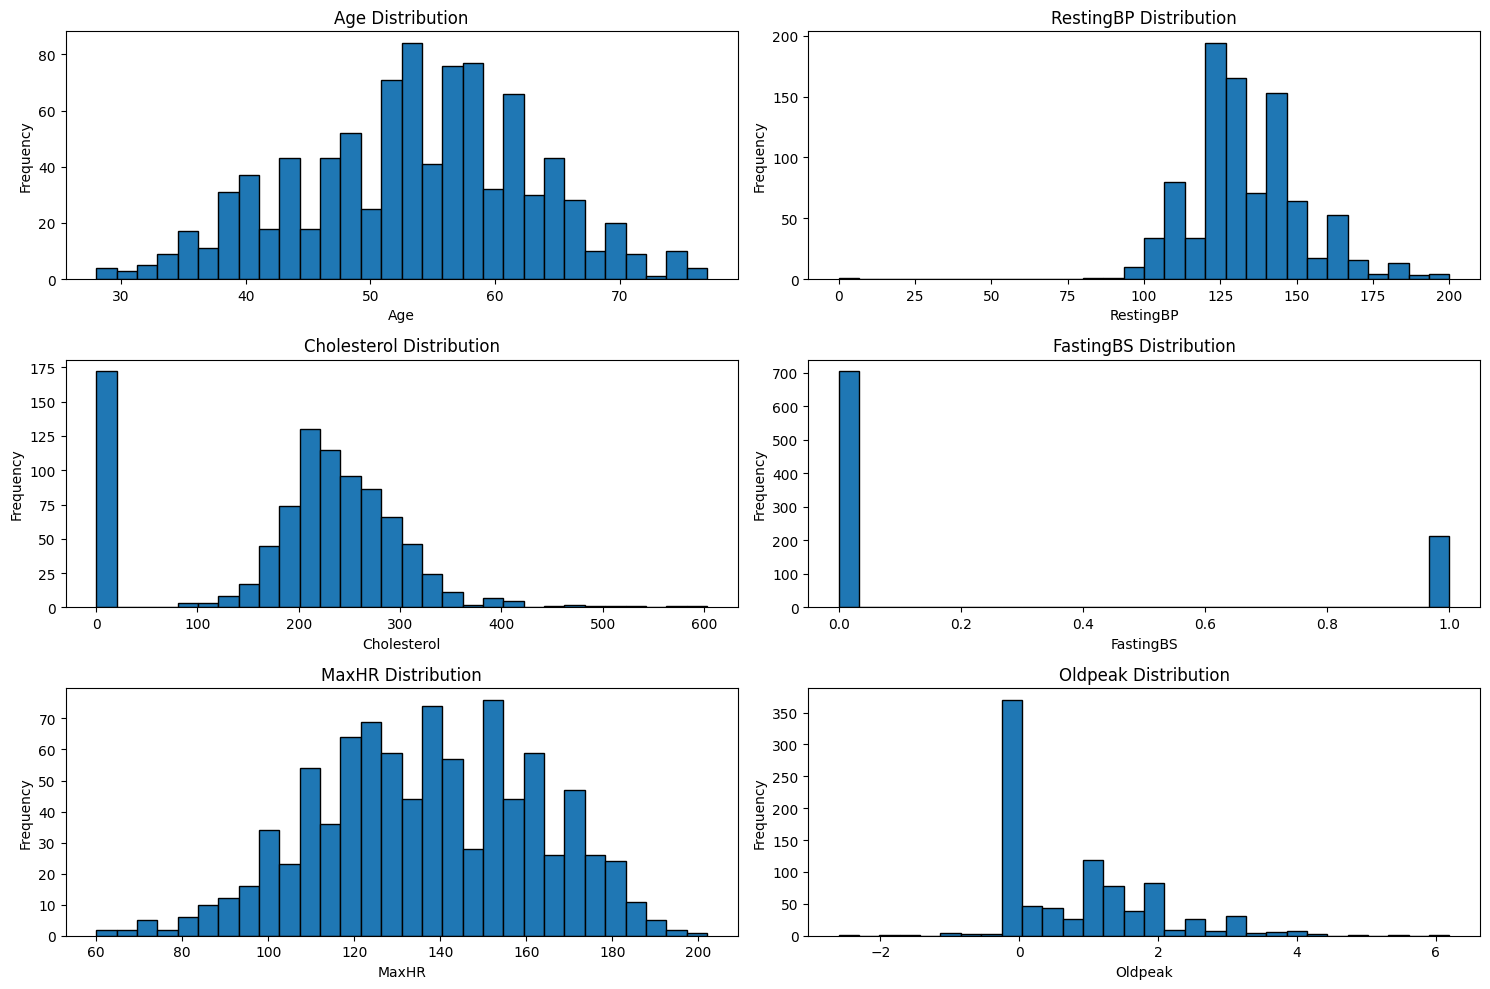

In [141]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten() 

for i, column in enumerate(numerical_columns):
    axes[i].hist(heart[column], bins=30, edgecolor='black') 
    axes[i].set_title(f'{column} Distribution')  
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Frequency')  

plt.tight_layout()

plt.show()

#### Changing Misleading Field Values

Replacing 0 values in "Cholesterol" and "RestingBP" attributes with "nan" because it's highly unlikely to have 0 cholesterol or 0 Blood pressure. 

In [142]:
heart['Cholesterol'] = heart['Cholesterol'].replace({0: np.nan})
heart['RestingBP'] = heart['RestingBP'].replace({0: np.nan})

Showing results after changing misleading values in those columns

(array([  3.,   3.,   6.,  10.,  32.,  49.,  75., 118.,  95.,  80.,  83.,
         66.,  50.,  24.,  22.,   8.,   2.,   7.,   4.,   1.,   0.,   1.,
          2.,   1.,   0.,   2.,   0.,   1.,   0.,   1.]),
 array([ 85.        , 102.26666667, 119.53333333, 136.8       ,
        154.06666667, 171.33333333, 188.6       , 205.86666667,
        223.13333333, 240.4       , 257.66666667, 274.93333333,
        292.2       , 309.46666667, 326.73333333, 344.        ,
        361.26666667, 378.53333333, 395.8       , 413.06666667,
        430.33333333, 447.6       , 464.86666667, 482.13333333,
        499.4       , 516.66666667, 533.93333333, 551.2       ,
        568.46666667, 585.73333333, 603.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Cholesterol Distribution')

Text(0.5, 0, 'Cholesterol')

Text(0, 0.5, 'Frequency')

(array([  1.,   0.,   0.,   9.,   2.,  19.,  15.,  65.,  36.,  13., 146.,
         49., 141.,  54.,  40., 123.,  30.,  57.,  18.,   6.,  50.,   3.,
         14.,   3.,   3.,  12.,   1.,   2.,   1.,   4.]),
 array([ 80.,  84.,  88.,  92.,  96., 100., 104., 108., 112., 116., 120.,
        124., 128., 132., 136., 140., 144., 148., 152., 156., 160., 164.,
        168., 172., 176., 180., 184., 188., 192., 196., 200.]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'RestingBP Distribution')

Text(0.5, 0, 'RestingBP')

Text(0, 0.5, 'Frequency')

<function matplotlib.pyplot.show(close=None, block=None)>

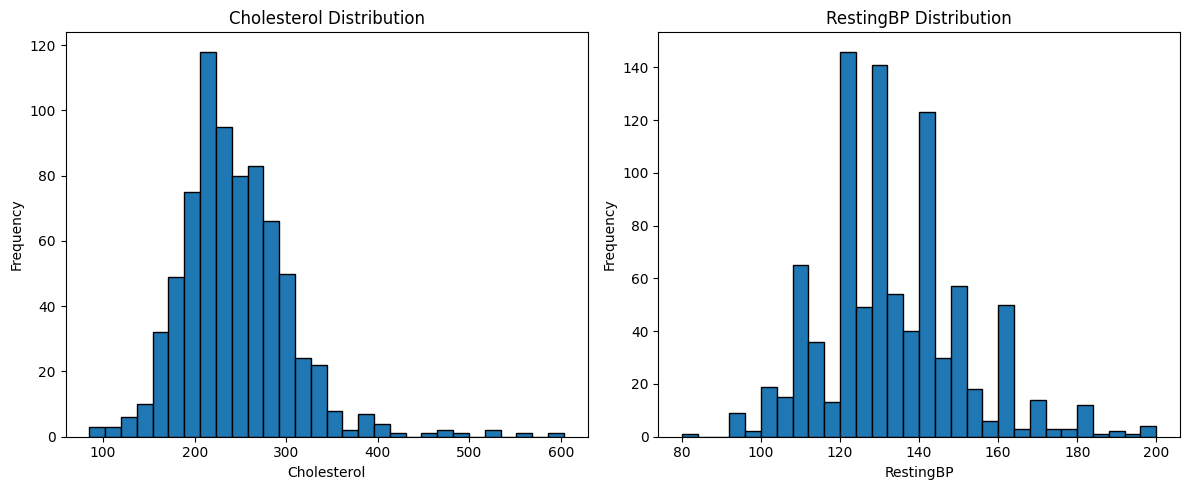

In [143]:
columns_to_show = ['Cholesterol', 'RestingBP']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, column in enumerate(columns_to_show):
    axes[i].hist(heart[column], bins=30, edgecolor='black')
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show

#### Standardizing Numeric Fields to Detect Outliers

In [144]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 
                     'MaxHR', 'Oldpeak']
heart_ZScore = pd.DataFrame()

for column in numerical_columns:
    # Calculating Z-score (standardizing)
    heart_ZScore[f'{column}_Z'] = stats.zscore(heart[column])


# Identifying Outliers
heart_age_outliers = heart_ZScore.query('Age_Z > 3 | Age_Z < -3')[['Age_Z']]
heart_resting_outliers = heart_ZScore.query('RestingBP_Z > 3 | RestingBP_Z < -3')[[ 'RestingBP_Z']]
heart_cholesterol_outliers = heart_ZScore.query('Cholesterol_Z > 3 | Cholesterol_Z < -3')[['Cholesterol_Z']]
heart_fasting_outliers = heart_ZScore.query('FastingBS_Z > 3 | FastingBS_Z < -3')[[ 'FastingBS_Z']]
heart_maxhr_outliers = heart_ZScore.query('MaxHR_Z > 3 | MaxHR_Z < -3')[['MaxHR_Z']]
heart_oldpeak_outliers = heart_ZScore.query('Oldpeak_Z > 3 | Oldpeak_Z < -3')[[ 'Oldpeak_Z']]

print("Age")
print(heart_age_outliers)
print("\nRestingBP_Z")
print(heart_resting_outliers)
print("\nCholesterol_Z")
print(heart_cholesterol_outliers)
print("\nFastingBS_Z")
print(heart_fasting_outliers)
print("\nMaxHR_Z")
print(heart_maxhr_outliers)
print("\nOldpeak_Z")
print(heart_oldpeak_outliers)


Age
Empty DataFrame
Columns: [Age_Z]
Index: []

RestingBP_Z
Empty DataFrame
Columns: [RestingBP_Z]
Index: []

Cholesterol_Z
Empty DataFrame
Columns: [Cholesterol_Z]
Index: []

FastingBS_Z
Empty DataFrame
Columns: [FastingBS_Z]
Index: []

MaxHR_Z
      MaxHR_Z
126 -3.018469

Oldpeak_Z
     Oldpeak_Z
9    -3.271482
208   4.983762
421   4.420905
512   3.858047
707   3.107570
809   3.107570
855   3.295190


Columns "MaxHR_Z" and "Oldpeak_Z" contain many outliers.

#### Changing target variable values to 'Yes' and 'No'

In [145]:
Disease_dict = {1: 'Yes', 0: 'No'}

heart['HeartDisease_categorical'] = heart['HeartDisease'].replace(Disease_dict)

heart['HeartDisease_categorical'] = heart['HeartDisease_categorical'].astype('category')

heart['HeartDisease_categorical']

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
913    Yes
914    Yes
915    Yes
916     No
917    Yes
Name: HeartDisease_categorical, Length: 918, dtype: category
Categories (2, object): ['No', 'Yes']

## Exploratory Data Analysis (EDA)

#### Exploring Categorical Features Using Bar Graph with Response Overlay

HeartDisease_categorical    No   Yes
Sex                                 
F                         34.9   9.8
M                         65.1  90.2

 HeartDisease_categorical    No   Yes
ChestPainType                       
ASY                       25.4  77.2
ATA                       36.3   4.7
NAP                       32.0  14.2
TA                         6.3   3.9

 HeartDisease_categorical    No   Yes
RestingECG                          
LVH                       20.0  20.9
Normal                    65.1  56.1
ST                        14.9  23.0

 HeartDisease_categorical    No   Yes
ExerciseAngina                      
N                         86.6  37.8
Y                         13.4  62.2

 HeartDisease_categorical    No   Yes
ST_Slope                            
Down                       3.4   9.6
Flat                      19.3  75.0
Up                        77.3  15.4


<Axes: xlabel='Sex'>

<Axes: xlabel='ChestPainType'>

<Axes: xlabel='RestingECG'>

<Axes: xlabel='ExerciseAngina'>

<Axes: xlabel='ST_Slope'>

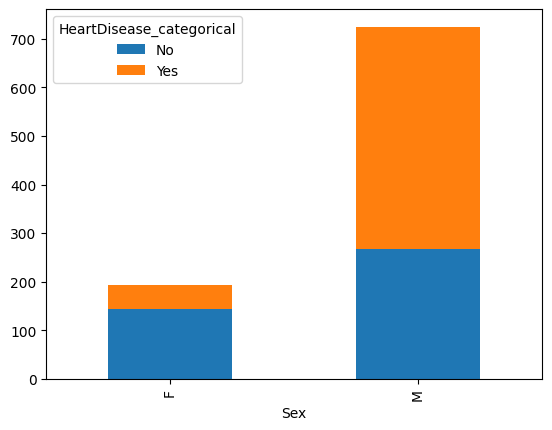

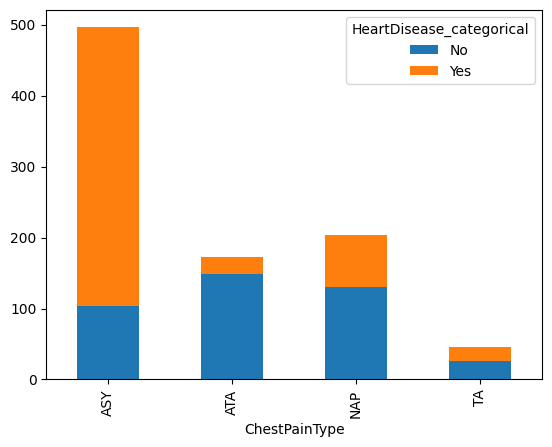

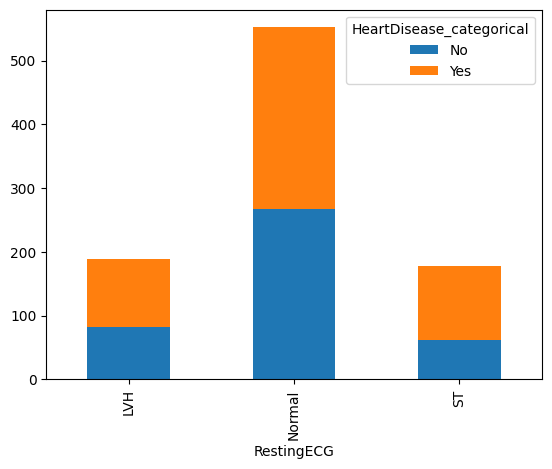

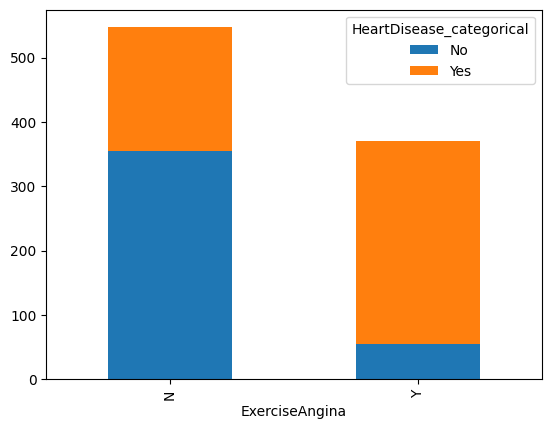

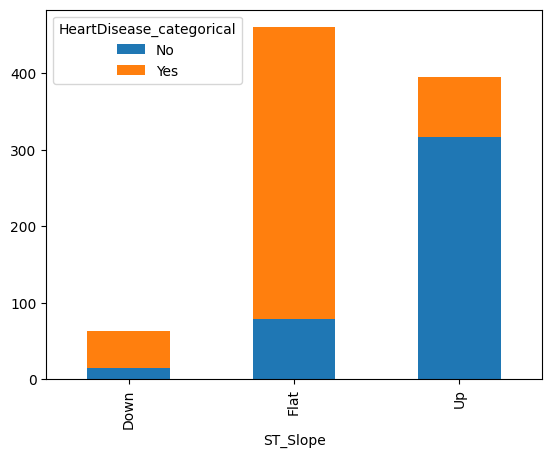

In [146]:
# Creating a contingency table 
crosstab_01 = pd.crosstab(heart['Sex'],  heart['HeartDisease_categorical'])
crosstab_02 = pd.crosstab(heart['ChestPainType'], heart['HeartDisease_categorical'])
crosstab_03 = pd.crosstab(heart['RestingECG'], heart['HeartDisease_categorical'])
crosstab_04 = pd.crosstab(heart['ExerciseAngina'], heart['HeartDisease_categorical'])
crosstab_05 = pd.crosstab(heart['ST_Slope'], heart['HeartDisease_categorical'])

# Calculating Column Proportions
proportions_01 = round(crosstab_01.div(crosstab_01.sum(0), axis=1) * 100, 1)
proportions_02 = round(crosstab_02.div(crosstab_02.sum(0), axis=1) * 100, 1)
proportions_03 = round(crosstab_03.div(crosstab_03.sum(0), axis=1) * 100, 1)
proportions_04 = round(crosstab_04.div(crosstab_04.sum(0), axis=1) * 100, 1)
proportions_05 = round(crosstab_05.div(crosstab_05.sum(0), axis=1) * 100, 1)


print(proportions_01)
print("\n", proportions_02)
print("\n", proportions_03)
print("\n", proportions_04)
print("\n", proportions_05)

# Bar graph
crosstab_01.plot(kind='bar', stacked= True)
crosstab_02.plot(kind='bar', stacked= True)
crosstab_03.plot(kind='bar', stacked= True)
crosstab_04.plot(kind='bar', stacked= True)
crosstab_05.plot(kind='bar', stacked= True)

Creating a Normalized Bar Graph

<Axes: xlabel='Sex'>

<Axes: xlabel='ChestPainType'>

<Axes: xlabel='RestingECG'>

<Axes: xlabel='ExerciseAngina'>

<Axes: xlabel='ST_Slope'>

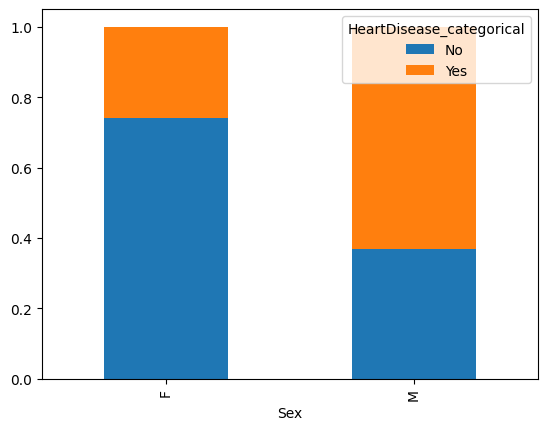

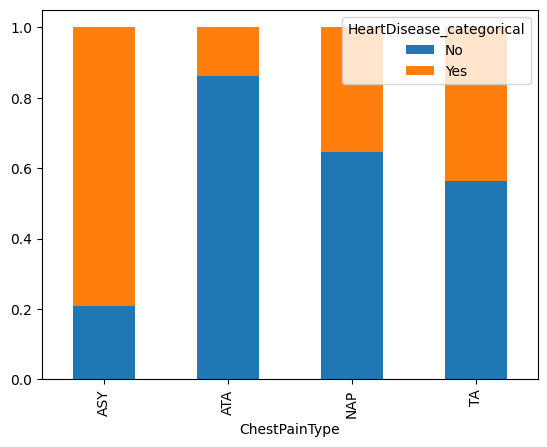

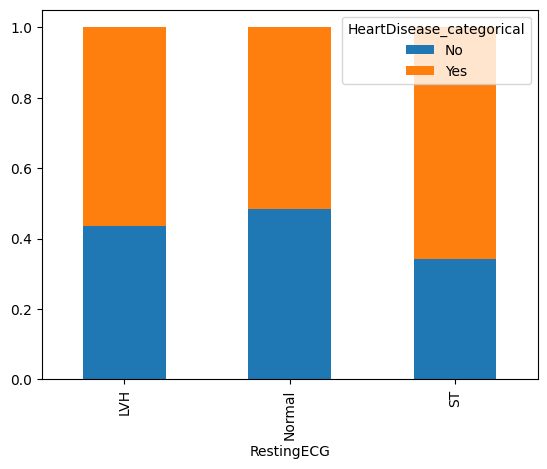

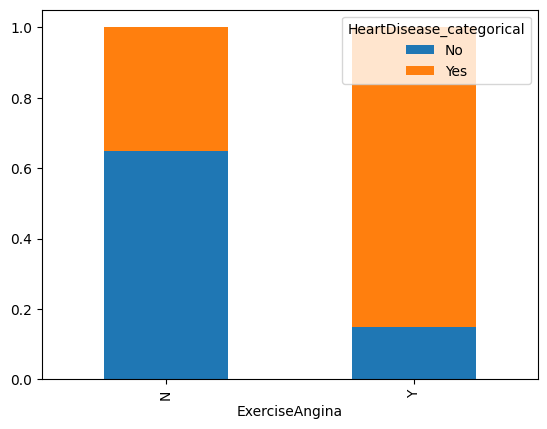

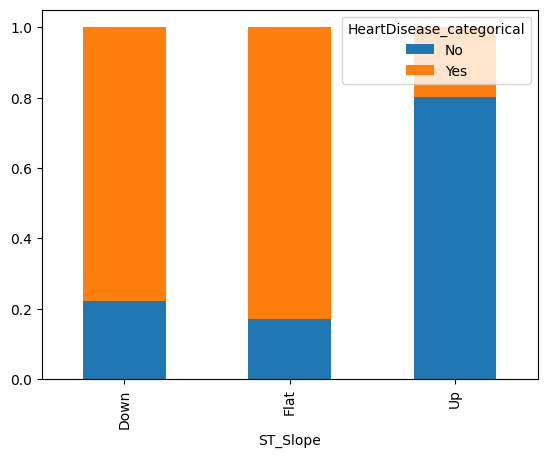

In [147]:
crosstab_norm_01 = crosstab_01.div(crosstab_01.sum(1), axis= 0)
crosstab_norm_02 = crosstab_02.div(crosstab_02.sum(1), axis= 0)
crosstab_norm_03 = crosstab_03.div(crosstab_03.sum(1), axis= 0)
crosstab_norm_04 = crosstab_04.div(crosstab_04.sum(1), axis= 0)
crosstab_norm_05 = crosstab_05.div(crosstab_05.sum(1), axis= 0)

crosstab_norm_01.plot(kind='bar', stacked= True)
crosstab_norm_02.plot(kind='bar', stacked= True)
crosstab_norm_03.plot(kind='bar', stacked= True)
crosstab_norm_04.plot(kind='bar', stacked= True)
crosstab_norm_05.plot(kind='bar', stacked= True)


#### Histogram with Response Overlay for Numerical Data

Text(0.5, 1.0, 'Normalized Histogram of Age with Response Overlay')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Proportion')

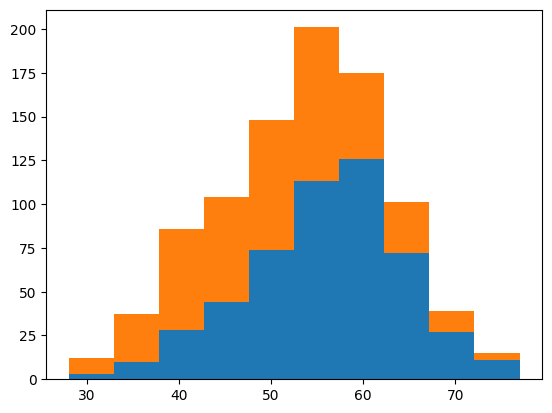

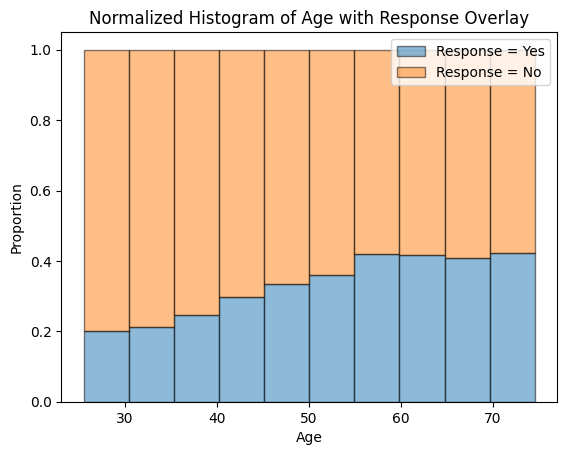

In [148]:
#numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

heart_age_y = heart[heart.HeartDisease_categorical == "Yes"]['Age']
heart_age_n = heart[heart.HeartDisease_categorical == "No"]['Age']

(n, bins, patches) = plt.hist([heart_age_y, heart_age_n], bins=10, stacked=True)

n_table = np.column_stack((n[0], n[1]))

n_norm = n_table / n_table.sum(axis=1)[:, None]

ourbins = np.column_stack((bins[:10], bins[1:11]))

fig, ax = plt.subplots()

p1 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1] - ourbins[:, 0], alpha=0.5, edgecolor='black', label='Heart Disease: Yes')
p2 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1] - ourbins[:, 0], bottom=n_norm[:, 0], alpha=0.5, edgecolor='black', label='Heart Disease: No')


plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Response Overlay')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()

This normalized bar graph shows how the risk of having a heart disease increase with age but at the same time exist a higher number of people without the disease.

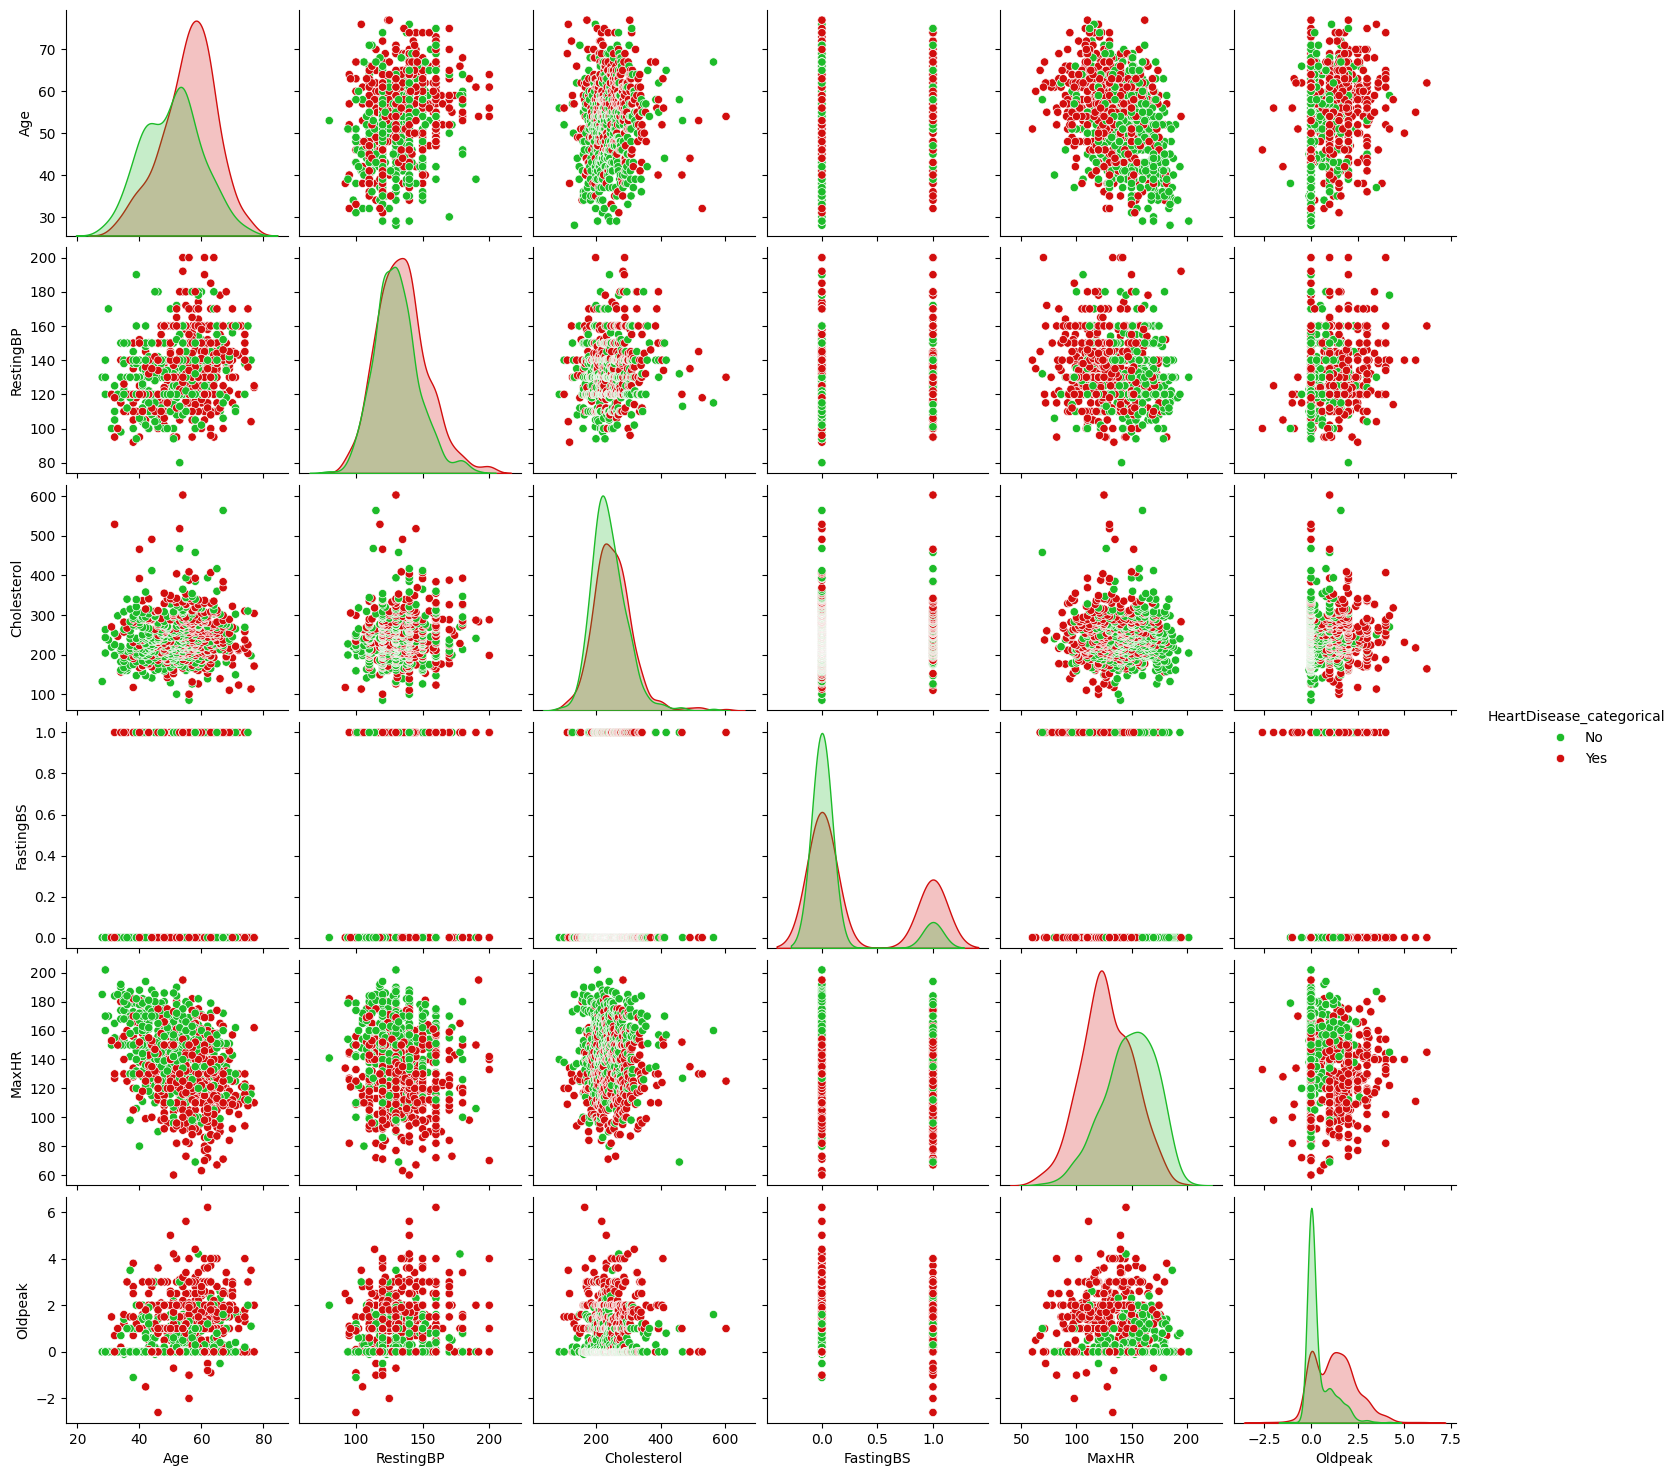

In [149]:
palette = {'No': '#1DBB29', 'Yes': '#D20E0E'}
sns.pairplot(heart, 
             vars=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], 
             diag_kind="kde", 
             hue='HeartDisease_categorical',
             palette=palette)

## Preparing to Model The Data

#### One Hot Encoding, Data Imputation, and Partitioning the Data

In [150]:
# Transforming categorical data into numerical data ( One Hot Encoding)
heart_encoded = pd.get_dummies(heart, columns=['Sex', 'ChestPainType', 
                                                                 'RestingECG', 
                                                                 'ExerciseAngina', 'ST_Slope',
                                                                   'HeartDisease_categorical'],
                                         drop_first=True)
# KNN Imputation
KNN_imputer = KNNImputer(n_neighbors=5)

heart_encoded[['Cholesterol']] = KNN_imputer.fit_transform(heart_encoded[['Cholesterol']])
heart_encoded[['RestingBP']] = KNN_imputer.fit_transform(heart_encoded[['RestingBP']])

# Partitioning the Data
heart_train, heart_test = train_test_split(heart_encoded, test_size= 0.25, random_state= 7)

print("Original Data Set:", heart_encoded.shape)
print("Training Data Set:", heart_train.shape, round(heart_train.shape[0] / heart_encoded.shape[0] * 100, 2), "%")
print("Test Data Set:", heart_test.shape, round(heart_test.shape[0] / heart_encoded.shape[0] * 100, 2), "%")

Original Data Set: (918, 18)
Training Data Set: (688, 18) 74.95 %
Test Data Set: (230, 18) 25.05 %


#### Correlations

In [151]:
heart_encoded.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Index,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_categorical_Yes
Age,1.000000,0.263081,0.053373,0.198039,-0.382045,0.258612,0.282039,-0.028882,0.055750,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067,0.282039
RestingBP,0.263081,1.000000,0.083076,0.067811,-0.109662,0.174220,0.117938,0.145586,0.009425,-0.051367,-0.027483,0.049463,-0.113718,0.089145,0.153008,0.110111,-0.105926,0.117938
Cholesterol,0.053373,0.083076,1.000000,0.043008,-0.017239,0.053029,0.094071,0.672500,-0.101706,-0.015288,-0.062229,-0.047322,-0.042407,-0.024530,0.077549,0.093627,-0.089995,0.094071
FastingBS,0.198039,0.067811,0.043008,1.000000,-0.131438,0.052698,0.267291,-0.198319,0.120076,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730,0.267291
MaxHR,-0.382045,-0.109662,-0.017239,-0.131438,1.000000,-0.160691,-0.400421,0.175307,-0.189186,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397,-0.400421
Oldpeak,0.258612,0.174220,0.053029,0.052698,-0.160691,1.000000,0.403951,0.072980,0.105734,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577,0.403951
HeartDisease,0.282039,0.117938,0.094071,0.267291,-0.400421,0.403951,1.000000,-0.139166,0.305445,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.494282,0.554134,-0.622164,1.000000
Index,-0.028882,0.145586,0.672500,-0.198319,0.175307,0.072980,-0.139166,1.000000,-0.181174,0.123510,-0.039486,0.005106,-0.065735,-0.105835,0.024372,-0.004604,0.043002,-0.139166
Sex_M,0.055750,0.009425,-0.101706,0.120076,-0.189186,0.105734,0.305445,-0.181174,1.000000,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942,0.305445
ChestPainType_ATA,-0.218165,-0.051367,-0.015288,-0.140514,0.253735,-0.262124,-0.401924,0.123510,-0.161522,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588,-0.401924


#### Skewness of The Distribution

In [152]:
heart_encoded.skew()

Age                            -0.195933
RestingBP                       0.607525
Cholesterol                     1.373396
FastingBS                       1.264484
MaxHR                          -0.144359
Oldpeak                         1.022872
HeartDisease                   -0.215086
Index                           0.000000
Sex_M                          -1.424540
ChestPainType_ATA               1.595899
ChestPainType_NAP               1.346107
ChestPainType_TA                4.130983
RestingECG_Normal              -0.414489
RestingECG_ST                   1.551033
ExerciseAngina_Y                0.391329
ST_Slope_Flat                  -0.004364
ST_Slope_Up                     0.282079
HeartDisease_categorical_Yes   -0.215086
dtype: float64

#### Validating The Data Partition

In [153]:
from statsmodels.stats.proportion import proportions_ztest

# Get counts for HeartDisease_categorical in training and test sets
count_train = np.sum(heart_train['HeartDisease'] == 1)
count_test = np.sum(heart_test['HeartDisease'] == 1)

n_train = len(heart_train)
n_test = len(heart_test)

# Perform two-sample Z-test for proportion
count = np.array([count_train, count_test])
nobs = np.array([n_train, n_test])

z_stat, p_val = proportions_ztest(count, nobs)

print(f'Two-sample Z-test for HeartDisease: z-statistic = {z_stat}, p-value = {p_val}')


Two-sample Z-test for HeartDisease: z-statistic = 1.268056802569942, p-value = 0.20477766636519124


Based on the Z-test result, there is no significant difference between the training and test sets for the HeartDisease_categorical variable. This indicates that the partitioning of the dataset into training and test sets did not introduce a systematic difference in the proportions of the "Yes" and "No" responses, which is a good indication that the partitioning is valid.

#### Balancing The Training Data Set

In [154]:
total_train = heart_train['HeartDisease_categorical_Yes'].value_counts()

Yes_total = total_train.iloc[1] / heart_train.shape[0] * 100
No_total = total_train.iloc[0] / heart_train.shape[0] * 100

print("Total number of 'Yes' in the Training:", round(Yes_total, 2), "%")
print("Total number of 'No' in the Training:", round(No_total, 2), "%")

total_train


Total number of 'Yes' in the Training: 43.46 %
Total number of 'No' in the Training: 56.54 %


HeartDisease_categorical_Yes
True     389
False    299
Name: count, dtype: int64

In [155]:
# Increasing the percentage of "Yes" and "No" responses to 50%
total_train = heart_train['HeartDisease_categorical_Yes'].value_counts()
current_yes_count = total_train[True]
current_no_count = total_train[False]

# Determine the target count for each class to achieve 50-50 balance
target_count = min(current_yes_count, current_no_count)

# Resample to achieve balance
if current_yes_count > target_count:
    # Downsample Yes
    to_downsample_yes = heart_train[heart_train['HeartDisease_categorical_Yes'] == True]
    downsampled_yes = to_downsample_yes.sample(n=target_count, random_state=7)
    balanced_train = pd.concat([downsampled_yes, heart_train[heart_train['HeartDisease_categorical_Yes'] == False]])
elif current_no_count > target_count:
    # Downsample No
    to_downsample_no = heart_train[heart_train['HeartDisease_categorical_Yes'] == False]
    downsampled_no = to_downsample_no.sample(n=target_count, random_state=7)
    balanced_train = pd.concat([downsampled_no, heart_train[heart_train['HeartDisease_categorical_Yes'] == True]])

# Shuffle the balanced dataset
balanced_train = balanced_train.sample(frac=1, random_state=7).reset_index(drop=True)

# Verify the balance
balanced_counts = balanced_train['HeartDisease_categorical_Yes'].value_counts()
print("Balanced distribution in the training dataset:")
print(balanced_counts)

Balanced distribution in the training dataset:
HeartDisease_categorical_Yes
True     299
False    299
Name: count, dtype: int64


#### Modeling Phase, Decision Trees

CART Method

<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 598\nvalue = [299, 299]\nclass = HeartDisease_No'),
 Text(0.25, 0.625, 'Sex_M <= 0.5\ngini = 0.353\nsamples = 328\nvalue = [75, 253]\nclass = HeartDisease_Yes'),
 Text(0.125, 0.375, 'gini = 0.498\nsamples = 58\nvalue = [31.0, 27.0]\nclass = HeartDisease_No'),
 Text(0.375, 0.375, 'MaxHR <= 150.5\ngini = 0.273\nsamples = 270\nvalue = [44, 226]\nclass = HeartDisease_Yes'),
 Text(0.25, 0.125, 'gini = 0.191\nsamples = 225\nvalue = [24, 201]\nclass = HeartDisease_Yes'),
 Text(0.5, 0.125, 'gini = 0.494\nsamples = 45\nvalue = [20, 25]\nclass = HeartDisease_Yes'),
 Text(0.75, 0.625, 'ExerciseAngina_Y <= 0.5\ngini = 0.283\nsamples = 270\nvalue = [224, 46]\nclass = HeartDisease_No'),
 Text(0.625, 0.375, 'gini = 0.212\nsamples = 241\nvalue = [212, 29]\nclass = HeartDisease_No'),
 Text(0.875, 0.375, 'gini = 0.485\nsamples = 29\nvalue = [12, 17]\nclass = HeartDisease_Yes')]

Text(0.5, 1.0, 'CART METHOD')

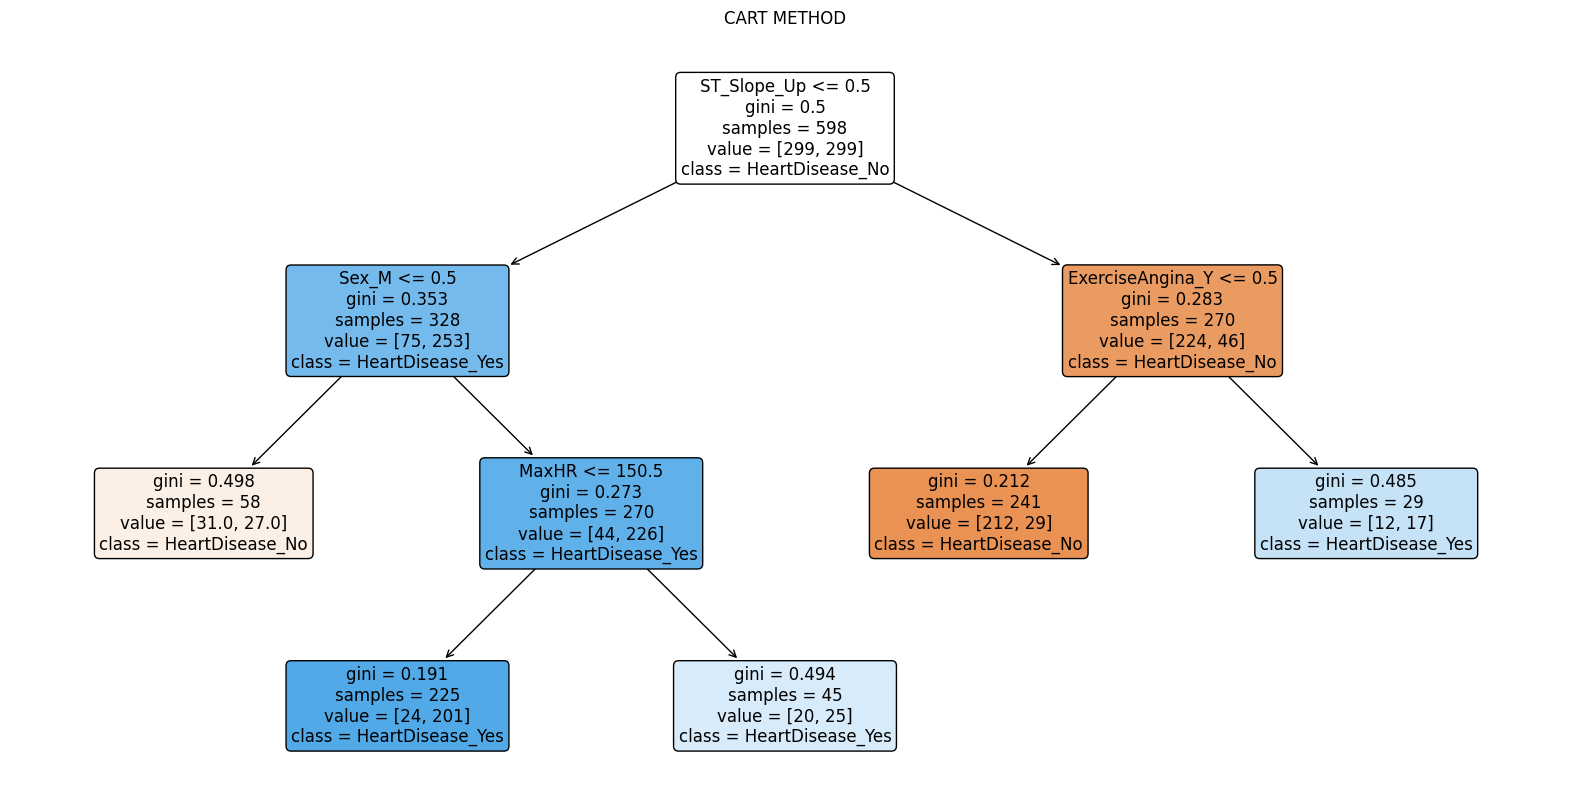

In [156]:
# Separate data into features and target variable
X = balanced_train.drop(['HeartDisease', 'HeartDisease_categorical_Yes', 'Index'], axis= 1)
y = balanced_train[['HeartDisease_categorical_Yes']]

# Defining feature names
X_names = list(balanced_train.columns)
X_names.remove('Index')
X_names.remove('HeartDisease')
X_names.remove('HeartDisease_categorical_Yes')

y_names = ["HeartDisease_No", 'HeartDisease_Yes']

# Running the CART algorithm / training
cart01 = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes= 5).fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(cart01, feature_names=X_names, class_names=y_names, filled=True, rounded=True, fontsize=12)
plt.title("CART METHOD")
plt.show()

Making predictions

In [157]:
feature_columns = [
    'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
    'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
    'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'
]

# Selecting feature columns
X_test = heart_test[feature_columns]

# Making predictions
predHeartDiseaseCART = cart01.predict(X_test)

# Selecting response variable
y_test = heart_test['HeartDisease']

# Results
print("Confusion Matrix:")
print(confusion_matrix(y_test, predHeartDiseaseCART))
print("\nClassification Report:")
print(classification_report(y_test, predHeartDiseaseCART, target_names=["0", "1"]))
print("\nAccuracy Score:")
print(accuracy_score(y_test, predHeartDiseaseCART))


Confusion Matrix:
[[86 25]
 [21 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       111
           1       0.80      0.82      0.81       119

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230


Accuracy Score:
0.8


C5.0 Method

<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'ST_Slope_Up <= 0.5\nentropy = 1.0\nsamples = 598\nvalue = [299, 299]\nclass = HeartDisease_No'),
 Text(0.25, 0.625, 'Sex_M <= 0.5\nentropy = 0.776\nsamples = 328\nvalue = [75, 253]\nclass = HeartDisease_Yes'),
 Text(0.125, 0.375, 'entropy = 0.997\nsamples = 58\nvalue = [31.0, 27.0]\nclass = HeartDisease_No'),
 Text(0.375, 0.375, 'MaxHR <= 150.5\nentropy = 0.641\nsamples = 270\nvalue = [44, 226]\nclass = HeartDisease_Yes'),
 Text(0.25, 0.125, 'entropy = 0.49\nsamples = 225\nvalue = [24, 201]\nclass = HeartDisease_Yes'),
 Text(0.5, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]\nclass = HeartDisease_Yes'),
 Text(0.75, 0.625, 'Oldpeak <= 0.45\nentropy = 0.659\nsamples = 270\nvalue = [224, 46]\nclass = HeartDisease_No'),
 Text(0.625, 0.375, 'entropy = 0.462\nsamples = 215\nvalue = [194, 21]\nclass = HeartDisease_No'),
 Text(0.875, 0.375, 'entropy = 0.994\nsamples = 55\nvalue = [30.0, 25.0]\nclass = HeartDisease_No')]

Text(0.5, 1.0, 'C5.0 METHOD')

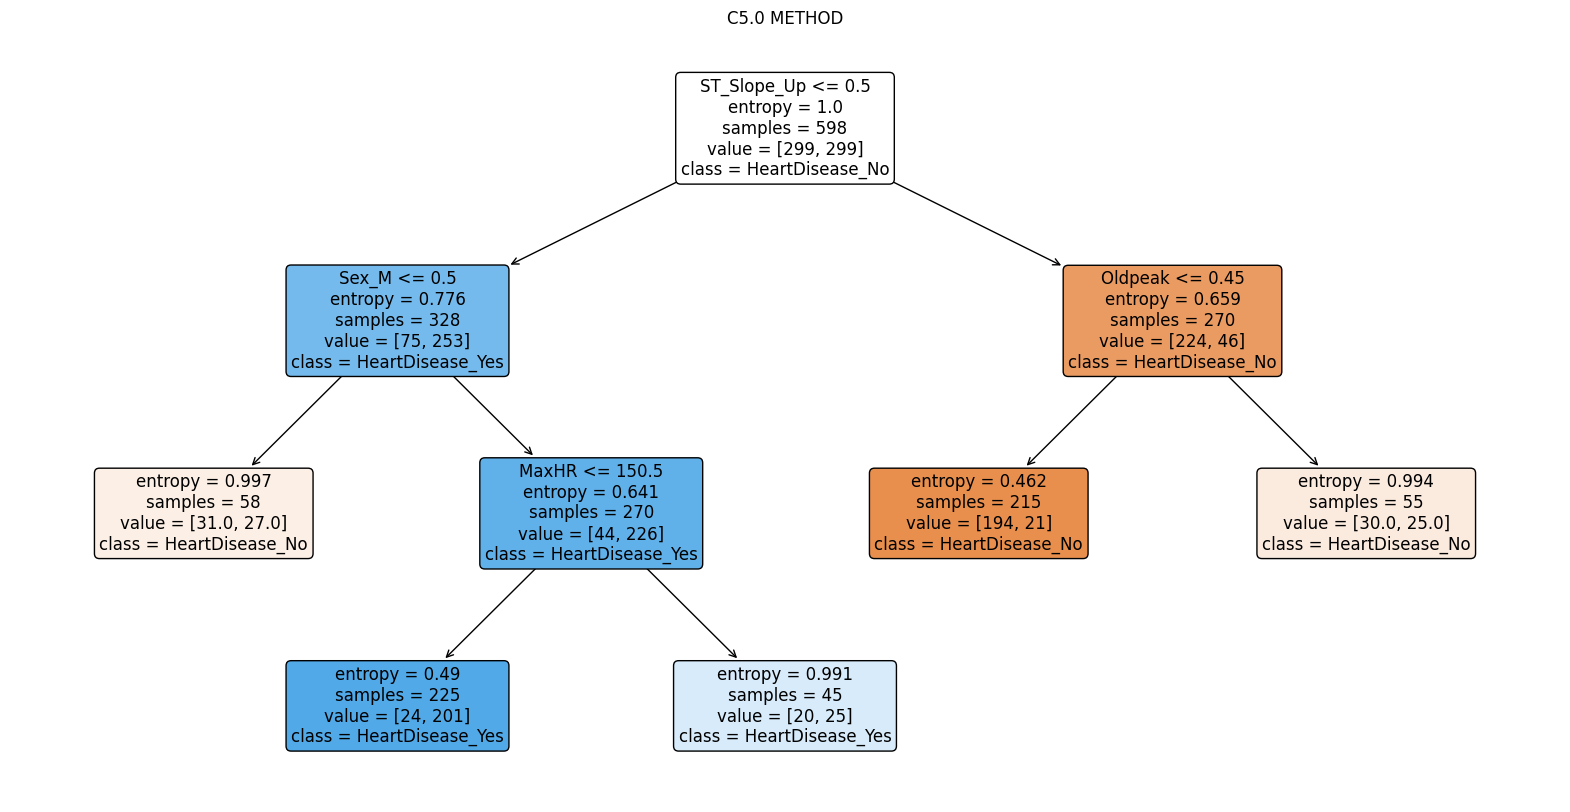

In [158]:
# Training algorithm
c50_01 = DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes= 5).fit(X,y)

# Visualizing c5.0
plt.figure(figsize=(20,10))
plot_tree(c50_01, feature_names=X_names, class_names=y_names, filled= True, rounded= True, fontsize= 12)
plt.title("C5.0 METHOD")
plt.show()

Predictions using c5.0

In [159]:
predHeartDiseasec50 = c50_01.predict(X_test)

# Results
print("Confusion Matrix:")
print(confusion_matrix(y_test, predHeartDiseasec50))
print("\nClassification Report:")
print(classification_report(y_test, predHeartDiseasec50, target_names=["0", "1"]))
print("\nAccuracy Score:")
print(accuracy_score(y_test, predHeartDiseasec50))

Confusion Matrix:
[[100  11]
 [ 29  90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       111
           1       0.89      0.76      0.82       119

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230


Accuracy Score:
0.8260869565217391


#### Using Random Forest Method

<Figure size 2000x1000 with 0 Axes>

[Text(0.5431034482758621, 0.9, 'ExerciseAngina_Y <= 0.5\ngini = 0.5\nsamples = 382\nvalue = [304, 294]\nclass = HeartDisease_No'),
 Text(0.27586206896551724, 0.7, 'RestingBP <= 117.0\ngini = 0.39\nsamples = 235\nvalue = [259.0, 96.0]\nclass = HeartDisease_No'),
 Text(0.13793103448275862, 0.5, 'Cholesterol <= 238.0\ngini = 0.5\nsamples = 46\nvalue = [32, 32]\nclass = HeartDisease_No'),
 Text(0.06896551724137931, 0.3, 'Sex_M <= 0.5\ngini = 0.3\nsamples = 18\nvalue = [18, 4]\nclass = HeartDisease_No'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, 'Sex_M <= 0.5\ngini = 0.44\nsamples = 28\nvalue = [14, 28]\nclass = HeartDisease_Yes'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, 'ST_Slope_Up <= 0.5\ngini = 0.34\nsamples = 189\nvalue = [227, 64]\nclass = HeartDisease_No'),
 Text(0.3448275862068966, 0.3, 'RestingBP <= 137.

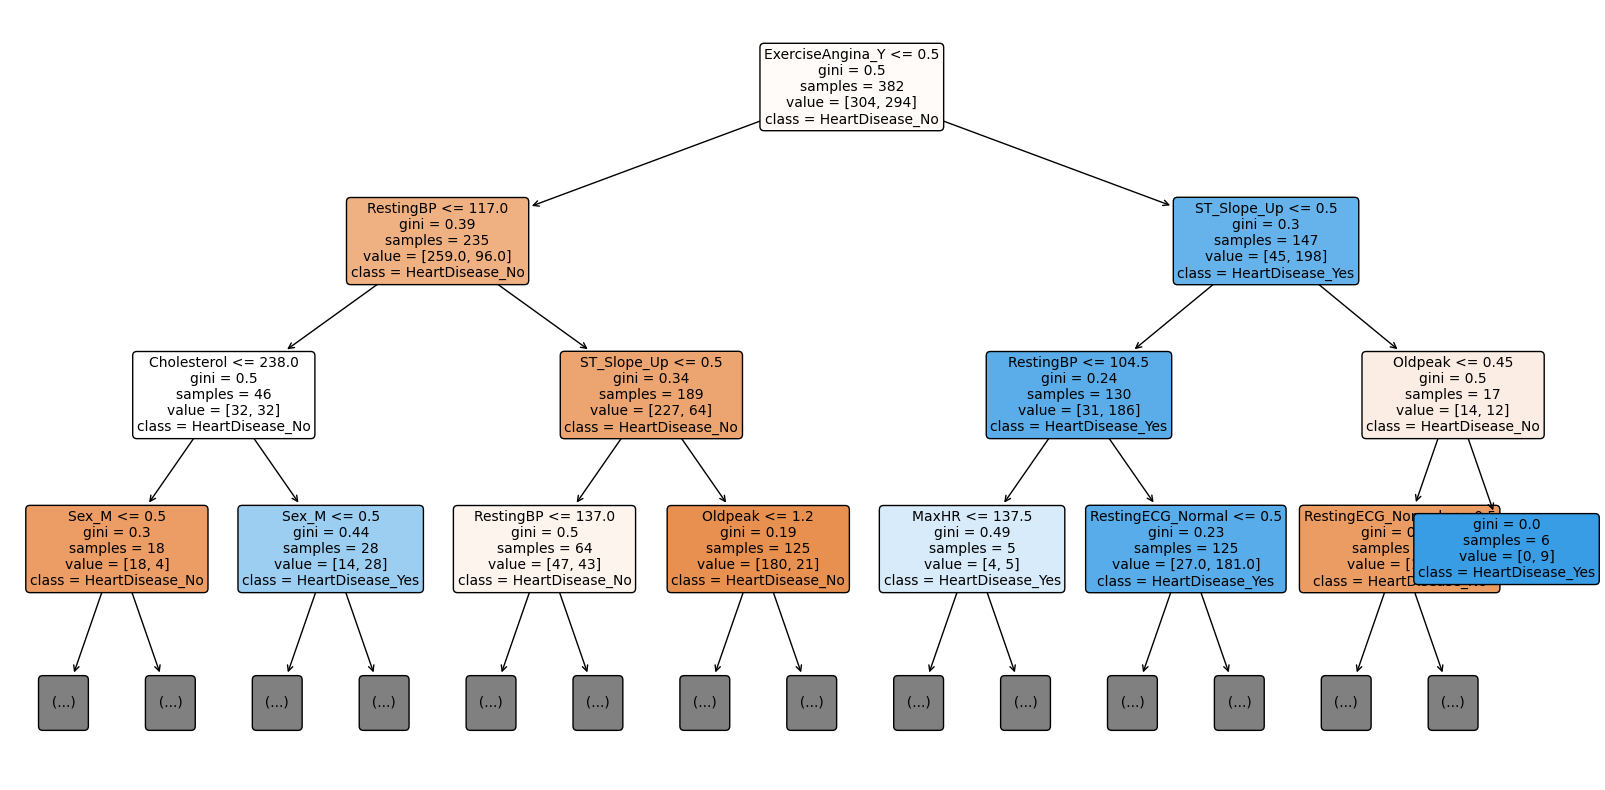

In [160]:
# Requires a response variable formatted as a one-dimensional array
rfy = np.ravel(y)

# Training RandomForest
rf01 = RandomForestClassifier(n_estimators= 100, random_state=42, criterion= 'gini').fit(X,rfy)

# Visualizing Random Forests
estimator = rf01.estimators_[0]

plt.figure(figsize=(20, 10))  
tree.plot_tree(estimator, 
               feature_names=X.columns, 
               class_names=["HeartDisease_No", 'HeartDisease_Yes'],  
               filled=True, 
               rounded=True, 
               proportion=False, 
               precision=2,
               fontsize=10,
               max_depth=3) 
plt.show()

Predicting using RandomForest method

In [161]:
predHeartDiseaseRandomForest = rf01.predict(X_test)

# Results
print("Confusion Matrix:")
print(confusion_matrix(y_test, predHeartDiseaseRandomForest))
print("\nClassification Report:")
print(classification_report(y_test, predHeartDiseaseRandomForest, target_names=["0", "1"]))
print("\nAccuracy Score:")
print(accuracy_score(y_test, predHeartDiseaseRandomForest))

Confusion Matrix:
[[ 91  20]
 [  9 110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       111
           1       0.85      0.92      0.88       119

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230


Accuracy Score:
0.8739130434782608


#### Naïve Bayes Method

First, handle negative numbers in column "Oldpeak"

In [162]:
# Initializing the MinMaxScaler function
scaler = MinMaxScaler()

X['Oldpeak'] = scaler.fit_transform(X[['Oldpeak']])

Training Naïve Bayes

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Log Probabilities for Each Class')

Text(0.5, 36.72222222222221, 'Class')

Text(120.5815972222222, 0.5, 'Features')

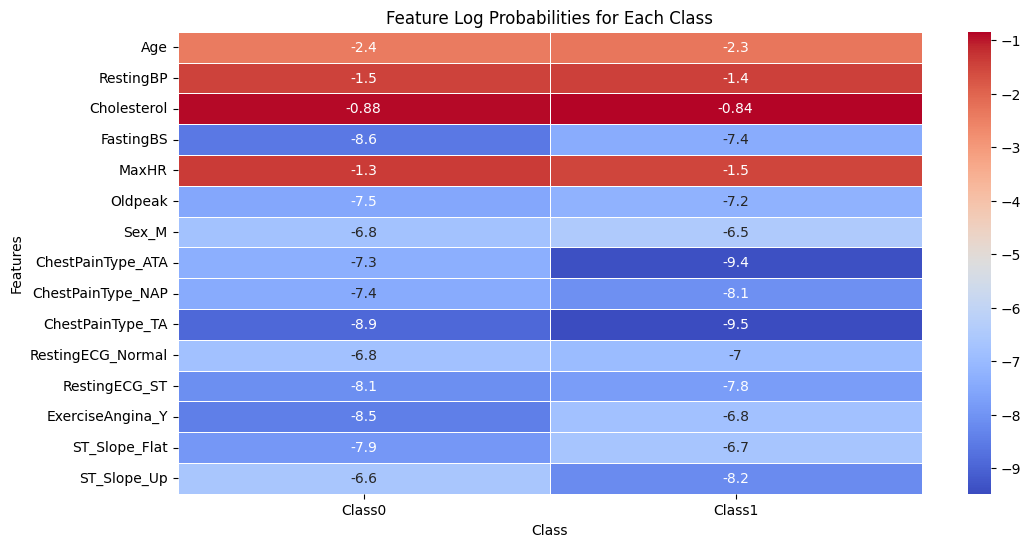

In [163]:
# Training Naive Bayes model
nb_01 = MultinomialNB().fit(X,rfy)

# Get feature log probabilities
feature_log_probs = nb_01.feature_log_prob_

# Convert to DataFrame for easier plotting
feature_log_probs_df = pd.DataFrame(feature_log_probs, columns=X.columns, index=['Class0', 'Class1'])

# Plot the feature log probabilities as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(feature_log_probs_df.T, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Feature Log Probabilities for Each Class')
plt.xlabel('Class')
plt.ylabel('Features')
plt.show()

Predicting using Naïve Bayes method

In [164]:
predHeartDiseasecNB = nb_01.predict(X_test)

# Results
print("Confusion Matrix:")
print(confusion_matrix(y_test, predHeartDiseasecNB))
print("\nClassification Report:")
print(classification_report(y_test, predHeartDiseasecNB, target_names=["0", "1"]))
print("\nAccuracy Score:")
print(accuracy_score(y_test, predHeartDiseasecNB))

Confusion Matrix:
[[88 23]
 [20 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       111
           1       0.81      0.83      0.82       119

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.81      0.81      0.81       230


Accuracy Score:
0.8130434782608695


Showing the contingency table of actual versus predicted outcomes

In [165]:
ypred = pd.crosstab(y_test, predHeartDiseasecNB, rownames= ['Actual'], colnames= ['Predicted'])

ypred['Total'] = ypred.sum(axis=1)
ypred.loc['Total'] = ypred.sum()
ypred

Predicted,False,True,Total
Actual,,,
0,88,23,111
1,20,99,119
Total,108,122,230


88 cases: The actual value is 0, and the model correctly predicted 0 (True Negative).

23 cases: The actual value is 0, but the model incorrectly predicted 1 (False Positive).

20 cases: The actual value is 1, but the model incorrectly predicted 0 (False Negative).

99 cases: The actual value is 1, and the model correctly predicted 1 (True Positive).

#### Neural Networks

In [166]:
X_train = X

# Performing min-max standarization on all numerical variables
X_train.loc[:, numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Building keras model
model = Sequential()
model.add(Input(shape=(15,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile keras model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y, epochs=150, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X_train, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

C:\Users\Gerard Corrales\AppData\Local\Temp\ipykernel_7620\3575049126.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.65306122 0.63265306 0.30612245 0.02040816 0.55102041 0.16326531
 0.69387755 0.69387755 0.59183673 0.69387755 0.26530612 0.48979592
 0.6122449  0.46938776 0.69387755 0.20408163 0.18367347 0.53061224
 0.24489796 0.32653061 0.65306122 0.34693878 0.20408163 0.26530612
 0.42857143 0.57142857 0.40816327 0.51020408 0.26530612 0.48979592
 0.42857143 0.57142857 0.34693878 0.55102041 0.55102041 0.34693878
 0.44897959 0.71428571 0.6122449  0.67346939 0.46938776 0.6122449
 0.36734694 0.14285714 0.53061224 0.57142857 0.46938776 0.71428571
 0.34693878 0.69387755 0.51020408 0.36734694 0.55102041 0.69387755
 0.26530612 0.55102041 0.55102041 0.20408163 0.46938776 0.71428571
 0.20408163 0.65306122 0.67346939 0.40816327 0.48979592 0.6122449
 0.57142857 0.69387755 0.55102041 0.53061224 0.93877551 0.67346939
 0.4

Accuracy: 87.96


Making predictions

In [167]:
# Performing min-max standarization on all numerical variables
X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])

# Predictions
prednnet01 = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\Gerard Corrales\AppData\Local\Temp\ipykernel_7620\2499469932.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.40816327 0.24489796 0.34693878 0.51020408 0.42857143 0.55102041
 0.36734694 0.53061224 0.63265306 0.59183673 0.51020408 0.6122449
 0.7755102  0.63265306 0.75510204 0.46938776 0.73469388 0.28571429
 0.65306122 0.53061224 0.67346939 0.69387755 0.57142857 0.6122449
 0.26530612 0.73469388 0.53061224 0.34693878 0.57142857 0.53061224
 0.51020408 0.89795918 0.65306122 0.6122449  0.63265306 0.81632653
 0.6122449  0.10204082 0.67346939 0.79591837 0.81632653 0.36734694
 0.40816327 0.20408163 0.48979592 0.59183673 0.83673469 0.53061224
 0.7755102  0.63265306 0.59183673 0.7755102  0.6122449  0.71428571
 0.14285714 0.46938776 0.40816327 0.71428571 0.44897959 0.65306122
 0.59183673 0.53061224 0.26530612 0.71428571 0.36734694 0.85714286
 0.7755102  0.14285714 0.30612245 0.73469388 0.67346939 0.48979592
 0.5

In [168]:
# Convert probabilities to binary predictions (0 or 1)
threshold = 0.5
prednnet01_binary = (prednnet01 > threshold).astype(int)

# Reshape to match y_test if necessary
prednnet01_binary = prednnet01_binary.reshape(-1)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, prednnet01_binary))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, prednnet01_binary, target_names=['No Heart Disease', 'Heart Disease']))

# Print accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, prednnet01_binary))


Confusion Matrix:
[[ 85  26]
 [ 10 109]]

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.89      0.77      0.83       111
   Heart Disease       0.81      0.92      0.86       119

        accuracy                           0.84       230
       macro avg       0.85      0.84      0.84       230
    weighted avg       0.85      0.84      0.84       230


Accuracy Score:
0.8434782608695652


#### Conclusion


CART model gives the accuracy of                    : 80%

C5.0 model gives the accuracy of                    : 83%

Random forest gives the accuracy of                 : 86%

Naïve Bayes gives the accuracy of                   : 81%

Neural Network gives the accuracy of                : 87%

#### Performing K-MEANS Clustering

Preparing the data

In [169]:
# Target variable
y = heart['HeartDisease']

# Selecting predictor variables
X = heart.drop(['Index','HeartDisease_categorical','HeartDisease'], axis=1)

# KNN Imputation for missing values
KNN_imputer = KNNImputer(n_neighbors=5)

X[['Cholesterol', 'RestingBP']] = KNN_imputer.fit_transform(X[['Cholesterol', 'RestingBP']])

# Selecting categorical variables
X_categorical = X[['Sex','ChestPainType', 'FastingBS','RestingECG','ExerciseAngina', 'ST_Slope' ]]

# Encoding categorical variables
X_categorical = pd.get_dummies(X_categorical)

# Selecting numerical variables
X_numerical = X[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Partitioning the Data
X_encoded = pd.concat([X_numerical, X_categorical], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size= 0.25, random_state= 7)

# Selecting numerical data to be standardized
X_train_num = X_train[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

In [170]:
# Standardizing numerical variables using z-score
Xz = pd.DataFrame(stats.zscore(X_train_num), columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
Xz = pd.concat([Xz, X_train[['Sex_M','ChestPainType_ATA', 'ChestPainType_NAP','ChestPainType_TA', 
                             'FastingBS', 'RestingECG_Normal', 'RestingECG_ST', 
                             'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]], axis=1)

In [171]:
# Running K-Means in two clusters
kmeans01 = KMeans(n_clusters= 2).fit(Xz)

# Investigating clustering results
cluster = kmeans01.labels_

# Separating the records in two groups
cluster1 = Xz.loc[cluster == 0]
cluster2 = Xz.loc[cluster == 1]

# Compute summary statistics of the two clusters
cluster1.describe()
cluster2.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,-0.596394,-0.343333,-0.149291,0.613984,-0.532313,0.142857
std,0.862114,0.827962,1.015546,0.806486,0.644066,0.350460
min,-2.694493,-2.878303,-3.014947,-1.790159,-2.728582,0.000000
25%,-1.319655,-0.692182,-0.796745,0.073946,-0.854691,0.000000
50%,-0.579357,-0.364264,-0.226896,0.695314,-0.854691,0.000000
75%,0.055184,0.127613,0.427091,1.239011,-0.386218,0.000000
max,1.535780,3.133530,4.748760,2.559419,2.705703,1.000000


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.546556,0.314642,0.136815,-0.562676,0.487830,0.320334
std,0.783837,1.042164,0.968311,0.813600,1.021118,0.467256
min,-1.636925,-2.058508,-2.728110,-2.955225,-1.791636,0.000000
25%,0.055184,-0.418917,-0.471664,-1.013449,-0.151981,0.000000
50%,0.583968,0.291572,0.071414,-0.586258,0.457033,0.000000
75%,1.006996,0.947409,0.637437,-0.061979,1.019201,1.000000
max,2.487591,3.680060,4.117720,1.510860,4.954373,1.000000


Validating the clustering result

In [172]:
X_test1 = X_test[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

Xz_test = pd.DataFrame(stats.zscore(X_test1), columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

Xz_test = pd.concat([Xz_test, X_test[['Sex_M','ChestPainType_ATA', 'ChestPainType_NAP','ChestPainType_TA', 
                             'FastingBS', 'RestingECG_Normal', 'RestingECG_ST', 
                             'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]], axis=1)

In [173]:
kmeans_test = KMeans(n_clusters= 2).fit(Xz_test)

cluster_test = kmeans_test.labels_ # cluster membership

Cluster1_test = Xz_test.loc[cluster_test == 0]
Cluster2_test = Xz_test.loc[cluster_test == 1]

Cluster1_test.describe()
Cluster2_test.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,-0.714292,-0.331794,-0.165274,0.612734,-0.548780,0.137615
std,0.812386,0.931602,0.840729,0.829480,0.592156,0.346086
min,-2.634200,-2.246479,-1.543479,-2.416409,-3.224142,0.000000
25%,-1.349678,-0.833953,-0.656677,0.043312,-0.768044,0.000000
50%,-0.707418,-0.421966,-0.246120,0.658243,-0.768044,0.000000
75%,-0.065157,0.343152,0.213704,1.273173,-0.579113,0.000000
max,1.219365,3.521335,4.499917,2.298058,2.538241,1.000000


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.643453,0.298889,0.148883,-0.551967,0.494356,0.305785
std,0.664655,0.972367,1.110568,0.805728,1.039762,0.462655
min,-1.456722,-1.893348,-2.118259,-2.826363,-1.523766,0.000000
25%,0.255973,-0.421966,-0.495738,-1.104558,-0.579113,0.000000
50%,0.684147,0.284296,-0.026061,-0.448632,0.554470,0.000000
75%,1.112321,1.049415,0.345082,0.043312,1.121262,1.000000
max,2.182756,3.992177,5.715165,1.396160,3.010568,1.000000


#### Principal Components Analysis

In [174]:
X_train.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263208,0.071952,-0.378694,0.255582,0.198728,-0.016016,0.016016,0.167967,-0.198415,-0.036384,0.037127,0.147852,-0.228743,0.129602,-0.198670,0.198670,0.163149,0.160342,-0.253188
RestingBP,0.263208,1.000000,0.100920,-0.107579,0.184638,0.048354,0.028393,-0.028393,0.038903,-0.058902,-0.018798,0.050677,0.060815,-0.109571,0.072324,-0.160084,0.160084,0.001963,0.090313,-0.092712
Cholesterol,0.071952,0.100920,1.000000,-0.051329,0.041990,0.050375,0.094364,-0.094364,0.147274,-0.034999,-0.116164,-0.049671,0.046166,-0.031803,-0.008189,-0.100057,0.100057,-0.017632,0.099927,-0.091594
MaxHR,-0.378694,-0.107579,-0.051329,1.000000,-0.167670,-0.124463,0.169312,-0.169312,-0.365912,0.255237,0.149750,0.093421,0.133774,0.018034,-0.159047,0.367401,-0.367401,-0.077076,-0.309131,0.356379
Oldpeak,0.255582,0.184638,0.041990,-0.167670,1.000000,0.067154,-0.082230,0.082230,0.300902,-0.264559,-0.123778,0.019328,0.106696,-0.129244,0.049529,-0.408817,0.408817,0.325299,0.291917,-0.476636
FastingBS,0.198728,0.048354,0.050375,-0.124463,0.067154,1.000000,-0.127340,0.127340,0.153495,-0.147633,-0.050525,0.008050,0.009597,-0.100193,0.113221,-0.078878,0.078878,0.122950,0.099546,-0.169206
Sex_F,-0.016016,0.028393,0.094364,0.169312,-0.082230,-0.127340,1.000000,-1.000000,-0.187354,0.180716,0.050204,0.010934,0.042910,-0.011706,-0.029537,0.182160,-0.182160,-0.071236,-0.104029,0.145062
Sex_M,0.016016,-0.028393,-0.094364,-0.169312,0.082230,0.127340,-1.000000,1.000000,0.187354,-0.180716,-0.050204,-0.010934,-0.042910,0.011706,0.029537,-0.182160,0.182160,0.071236,0.104029,-0.145062
ChestPainType_ASY,0.167967,0.038903,0.147274,-0.365912,0.300902,0.153495,-0.187354,0.187354,1.000000,-0.507769,-0.585517,-0.251986,-0.008246,-0.020616,0.033757,-0.455620,0.455620,0.107066,0.320147,-0.384195
ChestPainType_ATA,-0.198415,-0.058902,-0.034999,0.255237,-0.264559,-0.147633,0.180716,-0.180716,-0.507769,1.000000,-0.258528,-0.111261,-0.083267,0.088109,-0.022990,0.299228,-0.299228,-0.099717,-0.310907,0.370743


Running PCA with 20 components

In [183]:
pca01 = PCA(n_components=20)
principComp = pca01.fit_transform(X_train)

In [176]:
# Showing results, to know how many components to keep
np.cumsum(pca01.explained_variance_ratio_)

array([0.71661969, 0.89521197, 0.98086891, 0.99907387, 0.99940558,
       0.99952013, 0.99960988, 0.99968934, 0.99976175, 0.99982336,
       0.99987569, 0.99992133, 0.99996088, 0.9999838 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Based on this analysis, you should choose 4 components to retain over 99% of the variance in the data. 

This would give you a good balance between reducing the dimensionality and retaining the majority of the information in your dataset.

In [177]:
loadings = pca01.components_

feature_names = X_train.columns  # assuming X_train is your original DataFrame with feature names
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(len(loadings))], index=feature_names)

# Assuming you've already created loadings_df with all components
loadings_df_subset = loadings_df.iloc[:, :4]  
print(loadings_df_subset)

                        PC1       PC2       PC3       PC4
Age                0.015315  0.160390  0.114984  0.979738
RestingBP          0.041086  0.151005  0.977624 -0.140302
Cholesterol        0.998424 -0.042770 -0.035992 -0.004404
MaxHR             -0.034894 -0.974324  0.172111  0.139971
Oldpeak            0.000981  0.007851  0.009018  0.020000
FastingBS          0.000435  0.002142  0.000564  0.007694
Sex_F              0.000704 -0.002599  0.001306  0.002115
Sex_M             -0.000704  0.002599 -0.001306 -0.002115
ChestPainType_ASY  0.001469  0.006735 -0.001549  0.000806
ChestPainType_ATA -0.000301 -0.003849 -0.000089 -0.004272
ChestPainType_NAP -0.000954 -0.002222  0.000649  0.001664
ChestPainType_TA  -0.000214 -0.000664  0.000989  0.001802
RestingECG_LVH     0.000353 -0.001844  0.002204  0.010003
RestingECG_Normal -0.000322 -0.000746 -0.003119 -0.012591
RestingECG_ST     -0.000031  0.002590  0.000915  0.002588
ExerciseAngina_N  -0.001022 -0.007009 -0.001900 -0.000664
ExerciseAngina

PC1 might be heavily influenced by Cholesterol.

PC2 might be heavily influenced by MaxHR.

PC3 might be influenced by RestingBP.

PC4 might be influenced by Age.

In [178]:
X_train_pca = pca01.transform(X_train)[:, :4]  # Only keep the first 4 components
X_test_pca = pca01.transform(X_test)[:, :4]    # Apply the same transformation to the test set
print(loadings_df_subset)


                        PC1       PC2       PC3       PC4
Age                0.015315  0.160390  0.114984  0.979738
RestingBP          0.041086  0.151005  0.977624 -0.140302
Cholesterol        0.998424 -0.042770 -0.035992 -0.004404
MaxHR             -0.034894 -0.974324  0.172111  0.139971
Oldpeak            0.000981  0.007851  0.009018  0.020000
FastingBS          0.000435  0.002142  0.000564  0.007694
Sex_F              0.000704 -0.002599  0.001306  0.002115
Sex_M             -0.000704  0.002599 -0.001306 -0.002115
ChestPainType_ASY  0.001469  0.006735 -0.001549  0.000806
ChestPainType_ATA -0.000301 -0.003849 -0.000089 -0.004272
ChestPainType_NAP -0.000954 -0.002222  0.000649  0.001664
ChestPainType_TA  -0.000214 -0.000664  0.000989  0.001802
RestingECG_LVH     0.000353 -0.001844  0.002204  0.010003
RestingECG_Normal -0.000322 -0.000746 -0.003119 -0.012591
RestingECG_ST     -0.000031  0.002590  0.000915  0.002588
ExerciseAngina_N  -0.001022 -0.007009 -0.001900 -0.000664
ExerciseAngina

In [181]:
# Suppose you want to use the first 4 principal components for classification
X_train_pca = principComp[:, :4]  # Taking the first 4 principal components

# Train a model (e.g., logistic regression) on the PCA-transformed data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Similarly, transform your test data and predict
X_test_pca = pca01.transform(X_test)[:, :4]  # Apply the same transformation to test data
y_pred = model.predict(X_test_pca)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


LogisticRegression()

Accuracy: 0.71


In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Suppose you want to use the first 4 principal components for classification
X_train_pca = principComp[:, :4]  # Taking the first 4 principal components

# Train a Random Forest model on the PCA-transformed data
model = RandomForestClassifier(n_estimators=100, random_state=7)
model.fit(X_train_pca, y_train)

# Similarly, transform your test data and predict
X_test_pca = pca01.transform(X_test)[:, :4]  # Apply the same transformation to test data
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


RandomForestClassifier(random_state=7)

Accuracy: 0.70
